In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [90]:
df = pd.read_csv("generated_data.csv")
df.head()

,Product_Name,HSN_Code,Qty,Rate,Amount,Bill_No,Bill_Date,Buyer_Name
0,WHITE SBR(5 LTR),382450,88,1456,128128,1470,02-02-2024,"Stewart, Stanley and Brooks"
1,BROMEL FIX TYPE-1,382450,443,1289,571027,6086,15-07-2023,Wilson-Cortez
2,SPARKAL COPPER,382450,456,1946,887376,1446,13-05-2016,Snyder-Conrad
3,WHITE SBR(5 LTR),382450,370,870,321900,2578,20-11-2017,Wallace-Perez
4,BLOCK JOINING MOTAR,382450,934,1899,1773666,2955,05-04-2021,Bennett and Sons


In [91]:
df = df.drop(columns=['Product_Name', 'HSN_Code', 'Rate', 'Amount', 'Bill_No', 'Buyer_Name'], axis=1)
df.head()

,Qty,Bill_Date
0,88,02-02-2024
1,443,15-07-2023
2,456,13-05-2016
3,370,20-11-2017
4,934,05-04-2021


In [92]:
df['Bill_Date'] = pd.to_datetime(df['Bill_Date'], format='%d-%m-%Y')
df.sort_values(by='Bill_Date', inplace=True)
df.set_index('Bill_Date', inplace=True)
df

,Qty
Bill_Date,
2014-04-12,22
2014-04-12,285
2014-04-12,999
2014-04-12,89
2014-04-13,773
...,...
2024-04-09,300
2024-04-10,341
2024-04-10,790


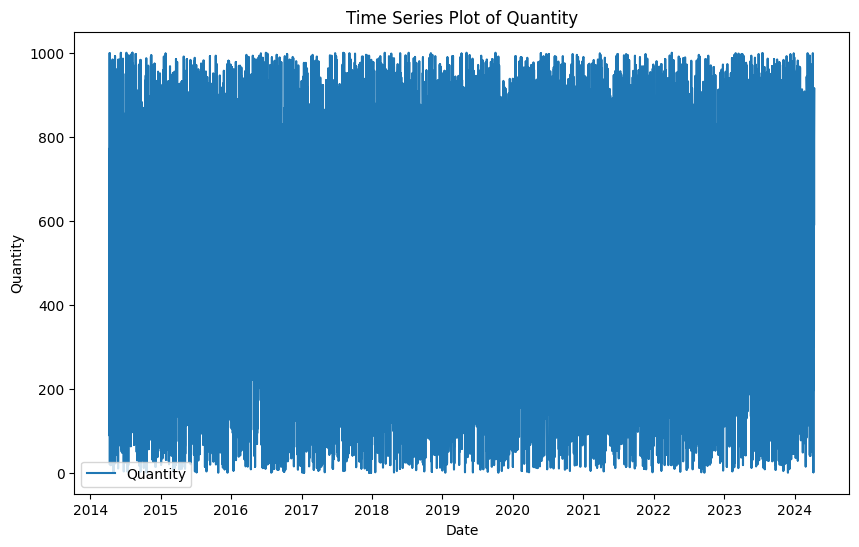

In [93]:
# Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Qty'], label='Quantity')
plt.title('Time Series Plot of Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

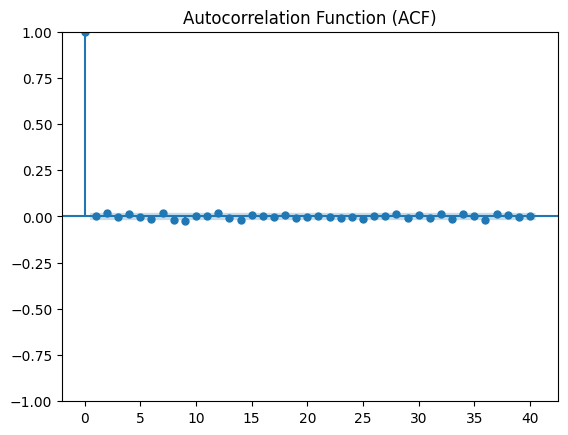

<Figure size 1200x600 with 0 Axes>

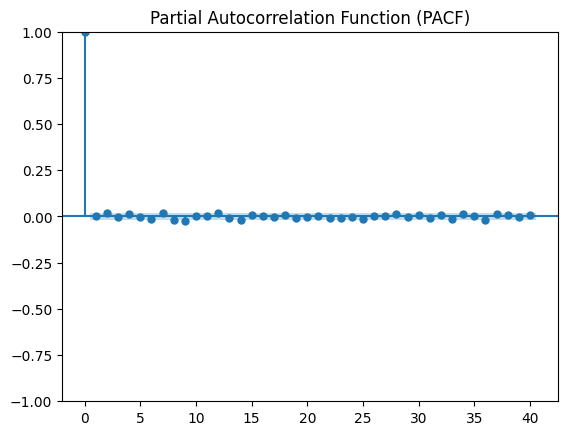

In [94]:
# Plot ACF and PACF to determine ARIMA parameters
plt.figure(figsize=(12, 6))
plot_acf(df['Qty'], title='Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Qty'], title='Partial Autocorrelation Function (PACF)')
plt.show()

c:\Users\INTEL\Repos\Data Analyst Practice\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\INTEL\Repos\Data Analyst Practice\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\INTEL\Repos\Data Analyst Practice\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\INTEL\Repos\Data Analyst Practice\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction resul

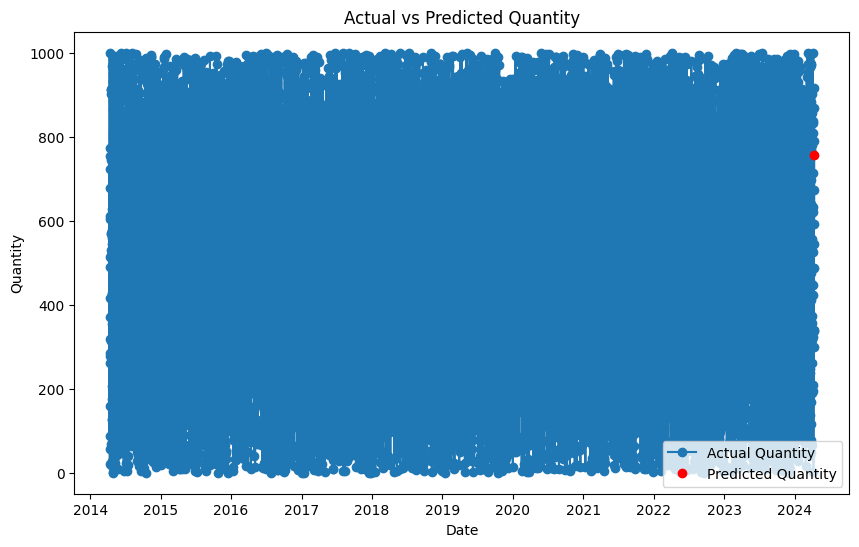

Forecasted Quantity for next month: 10000    756.667367
dtype: float64
Actual Quantity for next month: 592
Mean Squared Error (MSE): 27115.341848204393
Mean Absolute Error (MAE): 164.66736728388048
R-squared (R2) Error: nan


c:\Users\INTEL\Repos\Data Analyst Practice\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [104]:
if len(df) < 2:
    print("Insufficient data available for forecasting.")
else:
    try:
        # Fit ARIMA model
        # Adjust the order (p, d, q) based on the ACF and PACF plots
        # For example, if ACF drops off slowly and PACF has a sharp drop-off at lag 1, use (1, 1, 0)
        model = ARIMA(df['Qty'], order=(1, 1, 0))
        results = model.fit()

        # Forecast next month
        forecast = results.forecast(steps=1)

        # Plot actual and predicted values
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df['Qty'], label='Actual Quantity', marker='o')
        plt.plot(df.index[-1], forecast, 'ro', label='Predicted Quantity')  # Highlight the predicted value with a red circle
        plt.title('Actual vs Predicted Quantity')
        plt.xlabel('Date')
        plt.ylabel('Quantity')
        plt.legend()
        plt.show()

        # Calculate actual values for the next month
        actual_values = df['Qty'].iloc[-1]

        print("Forecasted Quantity for next month:", forecast)
        print("Actual Quantity for next month:", actual_values)
        
        # Calculate MSE, MAE, and R2
        mse = mean_squared_error([actual_values], [forecast])
        mae = mean_absolute_error([actual_values], [forecast])
        r2 = r2_score([actual_values], [forecast])

        # Print error metrics
        print("Mean Squared Error (MSE):", mse)
        print("Mean Absolute Error (MAE):", mae)
        print("R-squared (R2) Error:", r2)
    except Exception as e:
        print("Error during ARIMA fitting or forecasting:", e)